In [1]:
#coding:utf-8
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



criterion = nn.CrossEntropyLoss()




Files already downloaded and verified
Files already downloaded and verified


In [2]:
#SGD_MOMENTUM
net = Net().cuda()
'''
3. Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.
'''
import torch.optim as optim


optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adam([var1, var2], lr=0.0001)
#For example, this is very useful when one wants to specify per-layer learning rates:
'''
optim.SGD([
                {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)
optimizer = optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
optimizer = optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
'''
#This means that model.base’s parameters will use the default learning rate of 1e-2, 
#model.classifier’s parameters will use a learning rate of 1e-3, 
#and a momentum of 0.9 will be used for all parameters.
sgd_acc=[]
sgd_lossl=[]
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    correct=0
    total=0
    for i, data in enumerate(trainloader, 0):
         # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels=inputs.cuda(), labels.cuda()

         # zero the parameter gradients
        optimizer.zero_grad()

         # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        predicted=predicted.cpu()
        total += data[1].size(0)
        correct += predicted.eq(data[1]).sum().item()
        if i%100==99:
            print('[%d, %5d], loss: %.3f  ,acc:%.3f'%(epoch + 1, i + 1,running_loss/100,float(correct)/total))
            sgd_acc.append(float(correct)/total)
            sgd_lossl.append(running_loss/100)
            running_loss = 0.0
        #if i % 2000 == 1999:    # print every 2000 mini-batches
         #   print('[%d, %5d] loss: %.3f' %
         #          (epoch + 1, i + 1, running_loss / 2000))
         #   running_loss = 0.0
print('Finished Training')


[1,   100], loss: 2.303  ,acc:0.100
[1,   200], loss: 2.302  ,acc:0.099
[1,   300], loss: 2.302  ,acc:0.098
[1,   400], loss: 2.290  ,acc:0.106
[1,   500], loss: 2.293  ,acc:0.113
[1,   600], loss: 2.281  ,acc:0.121
[1,   700], loss: 2.249  ,acc:0.127
[1,   800], loss: 2.251  ,acc:0.128
[1,   900], loss: 2.204  ,acc:0.133
[1,  1000], loss: 2.196  ,acc:0.140
[1,  1100], loss: 2.187  ,acc:0.143
[1,  1200], loss: 2.135  ,acc:0.153
[1,  1300], loss: 2.175  ,acc:0.157
[1,  1400], loss: 2.149  ,acc:0.161
[1,  1500], loss: 2.138  ,acc:0.168
[1,  1600], loss: 2.084  ,acc:0.172
[1,  1700], loss: 2.045  ,acc:0.176
[1,  1800], loss: 2.059  ,acc:0.177
[1,  1900], loss: 1.994  ,acc:0.182
[1,  2000], loss: 2.025  ,acc:0.183
[1,  2100], loss: 2.023  ,acc:0.185
[1,  2200], loss: 2.027  ,acc:0.187
[1,  2300], loss: 1.937  ,acc:0.191
[1,  2400], loss: 1.954  ,acc:0.195
[1,  2500], loss: 1.903  ,acc:0.199
[1,  2600], loss: 1.873  ,acc:0.203
[1,  2700], loss: 1.909  ,acc:0.206
[1,  2800], loss: 1.888  ,ac

In [3]:
print(len(sgd_acc))
print(len(sgd_lossl))

625
625


In [4]:
#ADagrad
net1 = Net().cuda()
'''
3. Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.
'''
import torch.optim as optim


optimizer = optim.Adagrad(net1.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
adag_acc=[]
adag_lossl=[]
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    correct=0
    total=0
    for i, data in enumerate(trainloader, 0):
         # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels=inputs.cuda(), labels.cuda()

         # zero the parameter gradients
        optimizer.zero_grad()

         # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        predicted=predicted.cpu()
        total += data[1].size(0)
        correct += predicted.eq(data[1]).sum().item()
        if i%100==99:
            print('[%d, %5d], loss: %.3f  ,acc:%.3f'%(epoch + 1, i + 1,running_loss/100,float(correct)/total))
            adag_acc.append(float(correct)/total)
            adag_lossl.append(running_loss/100)
            running_loss = 0.0
        #if i % 2000 == 1999:    # print every 2000 mini-batches
         #   print('[%d, %5d] loss: %.3f' %
         #          (epoch + 1, i + 1, running_loss / 2000))
         #   running_loss = 0.0
print('Finished Training')


[1,   100], loss: 2.250  ,acc:0.113
[1,   200], loss: 2.210  ,acc:0.135
[1,   300], loss: 2.082  ,acc:0.163
[1,   400], loss: 2.034  ,acc:0.178
[1,   500], loss: 2.034  ,acc:0.181
[1,   600], loss: 1.962  ,acc:0.188
[1,   700], loss: 1.986  ,acc:0.198
[1,   800], loss: 1.934  ,acc:0.209
[1,   900], loss: 1.887  ,acc:0.219
[1,  1000], loss: 1.839  ,acc:0.230
[1,  1100], loss: 1.813  ,acc:0.238
[1,  1200], loss: 1.823  ,acc:0.246
[1,  1300], loss: 1.756  ,acc:0.257
[1,  1400], loss: 1.768  ,acc:0.261
[1,  1500], loss: 1.748  ,acc:0.267
[1,  1600], loss: 1.763  ,acc:0.275
[1,  1700], loss: 1.717  ,acc:0.281
[1,  1800], loss: 1.766  ,acc:0.285
[1,  1900], loss: 1.714  ,acc:0.290
[1,  2000], loss: 1.783  ,acc:0.293
[1,  2100], loss: 1.761  ,acc:0.296
[1,  2200], loss: 1.689  ,acc:0.300
[1,  2300], loss: 1.748  ,acc:0.303
[1,  2400], loss: 1.669  ,acc:0.305
[1,  2500], loss: 1.687  ,acc:0.308
[1,  2600], loss: 1.698  ,acc:0.311
[1,  2700], loss: 1.789  ,acc:0.312
[1,  2800], loss: 1.592  ,ac

In [5]:
print(len(adag_acc))
print(len(adag_lossl))

625
625


In [6]:
#RMSR
net2 = Net().cuda()
'''
3. Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.
'''
import torch.optim as optim


optimizer = optim.RMSprop(net2.parameters(), lr=0.001)

#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adam([var1, var2], lr=0.0001)
#For example, this is very useful when one wants to specify per-layer learning rates:
'''
optim.SGD([
                {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)
optimizer = optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
optimizer = optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
'''
#This means that model.base’s parameters will use the default learning rate of 1e-2, 
#model.classifier’s parameters will use a learning rate of 1e-3, 
#and a momentum of 0.9 will be used for all parameters.
rms_acc=[]
rms_lossl=[]
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    correct=0
    total=0

    for i, data in enumerate(trainloader, 0):
         # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels=inputs.cuda(), labels.cuda()

         # zero the parameter gradients
        optimizer.zero_grad()

         # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        predicted=predicted.cpu()
        total += data[1].size(0)
        correct += predicted.eq(data[1]).sum().item()
        if i%100==99:
            print('[%d, %5d], loss: %.3f  ,acc:%.3f'%(epoch + 1, i + 1,running_loss/100,float(correct)/total))
            rms_acc.append(float(correct)/total)
            rms_lossl.append(running_loss/100)
            running_loss = 0.0
        #if i % 2000 == 1999:    # print every 2000 mini-batches
         #   print('[%d, %5d] loss: %.3f' %
         #          (epoch + 1, i + 1, running_loss / 2000))
         #   running_loss = 0.0
print('Finished Training')


[1,   100], loss: 2.303  ,acc:0.133
[1,   200], loss: 2.157  ,acc:0.165
[1,   300], loss: 2.099  ,acc:0.183
[1,   400], loss: 2.063  ,acc:0.196
[1,   500], loss: 2.016  ,acc:0.209
[1,   600], loss: 1.876  ,acc:0.220
[1,   700], loss: 1.894  ,acc:0.235
[1,   800], loss: 1.835  ,acc:0.243
[1,   900], loss: 1.929  ,acc:0.248
[1,  1000], loss: 1.889  ,acc:0.251
[1,  1100], loss: 1.766  ,acc:0.259
[1,  1200], loss: 1.789  ,acc:0.266
[1,  1300], loss: 1.764  ,acc:0.270
[1,  1400], loss: 1.723  ,acc:0.277
[1,  1500], loss: 1.723  ,acc:0.283
[1,  1600], loss: 1.729  ,acc:0.289
[1,  1700], loss: 1.671  ,acc:0.296
[1,  1800], loss: 1.767  ,acc:0.299
[1,  1900], loss: 1.652  ,acc:0.304
[1,  2000], loss: 1.710  ,acc:0.307
[1,  2100], loss: 1.647  ,acc:0.310
[1,  2200], loss: 1.749  ,acc:0.313
[1,  2300], loss: 1.625  ,acc:0.317
[1,  2400], loss: 1.630  ,acc:0.321
[1,  2500], loss: 1.614  ,acc:0.325
[1,  2600], loss: 1.679  ,acc:0.328
[1,  2700], loss: 1.650  ,acc:0.330
[1,  2800], loss: 1.602  ,ac

In [7]:
print(len(rms_acc))
print(len(rms_lossl))

625
625


In [8]:
#ADA-DELTA
net3 = Net().cuda()
'''
3. Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.
'''
import torch.optim as optim


optimizer = optim.Adadelta(net3.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adam([var1, var2], lr=0.0001)
#For example, this is very useful when one wants to specify per-layer learning rates:
'''
optim.SGD([
                {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)
optimizer = optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
optimizer = optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
'''
#This means that model.base’s parameters will use the default learning rate of 1e-2, 
#model.classifier’s parameters will use a learning rate of 1e-3, 
#and a momentum of 0.9 will be used for all parameters.
adad_acc=[]
adad_lossl=[]
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    correct=0
    total=0

    for i, data in enumerate(trainloader, 0):
         # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels=inputs.cuda(), labels.cuda()

         # zero the parameter gradients
        optimizer.zero_grad()

         # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        predicted=predicted.cpu()
        total += data[1].size(0)
        correct += predicted.eq(data[1]).sum().item()
        if i%100==99:
            print('[%d, %5d], loss: %.3f  ,acc:%.3f'%(epoch + 1, i + 1,running_loss/100,float(correct)/total))
            adad_acc.append(float(correct)/total)
            adad_lossl.append(running_loss/100)
            running_loss = 0.0
        #if i % 2000 == 1999:    # print every 2000 mini-batches
         #   print('[%d, %5d] loss: %.3f' %
         #          (epoch + 1, i + 1, running_loss / 2000))
         #   running_loss = 0.0
print('Finished Training')


[1,   100], loss: 2.282  ,acc:0.140
[1,   200], loss: 2.156  ,acc:0.155
[1,   300], loss: 2.042  ,acc:0.182
[1,   400], loss: 2.063  ,acc:0.184
[1,   500], loss: 1.986  ,acc:0.195
[1,   600], loss: 2.014  ,acc:0.207
[1,   700], loss: 1.962  ,acc:0.216
[1,   800], loss: 1.984  ,acc:0.226
[1,   900], loss: 1.975  ,acc:0.232
[1,  1000], loss: 1.895  ,acc:0.240
[1,  1100], loss: 1.858  ,acc:0.245
[1,  1200], loss: 1.798  ,acc:0.253
[1,  1300], loss: 1.781  ,acc:0.263
[1,  1400], loss: 1.804  ,acc:0.268
[1,  1500], loss: 1.799  ,acc:0.273
[1,  1600], loss: 1.772  ,acc:0.278
[1,  1700], loss: 1.762  ,acc:0.283
[1,  1800], loss: 1.867  ,acc:0.285
[1,  1900], loss: 1.735  ,acc:0.288
[1,  2000], loss: 1.738  ,acc:0.291
[1,  2100], loss: 1.756  ,acc:0.294
[1,  2200], loss: 1.673  ,acc:0.298
[1,  2300], loss: 1.754  ,acc:0.301
[1,  2400], loss: 1.679  ,acc:0.304
[1,  2500], loss: 1.788  ,acc:0.304
[1,  2600], loss: 1.682  ,acc:0.307
[1,  2700], loss: 1.671  ,acc:0.311
[1,  2800], loss: 1.742  ,ac

In [9]:
print(len(adad_acc))
print(len(adad_lossl))

625
625


In [10]:
#ADAM
net4 = Net().cuda()
'''
3. Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.
'''
import torch.optim as optim


optimizer = optim.Adam(net4.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adam([var1, var2], lr=0.0001)
#For example, this is very useful when one wants to specify per-layer learning rates:
'''
optim.SGD([
                {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)
optimizer = optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
optimizer = optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
'''
#This means that model.base’s parameters will use the default learning rate of 1e-2, 
#model.classifier’s parameters will use a learning rate of 1e-3, 
#and a momentum of 0.9 will be used for all parameters.
adam_acc=[]
adam_lossl=[]
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    correct=0
    total=0
    for i, data in enumerate(trainloader, 0):
         # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels=inputs.cuda(), labels.cuda()

         # zero the parameter gradients
        optimizer.zero_grad()

         # forward + backward + optimize
        outputs = net4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        predicted=predicted.cpu()
        total += data[1].size(0)
        correct += predicted.eq(data[1]).sum().item()
        if i%100==99:
            print('[%d, %5d], loss: %.3f  ,acc:%.3f'%(epoch + 1, i + 1,running_loss/100,float(correct)/total))
            adam_acc.append(float(correct)/total)
            adam_lossl.append(running_loss/100)
            running_loss = 0.0
        #if i % 2000 == 1999:    # print every 2000 mini-batches
         #   print('[%d, %5d] loss: %.3f' %
         #          (epoch + 1, i + 1, running_loss / 2000))
         #   running_loss = 0.0
print('Finished Training')


[1,   100], loss: 2.295  ,acc:0.115
[1,   200], loss: 2.169  ,acc:0.154
[1,   300], loss: 2.121  ,acc:0.152
[1,   400], loss: 2.075  ,acc:0.166
[1,   500], loss: 1.991  ,acc:0.181
[1,   600], loss: 1.960  ,acc:0.200
[1,   700], loss: 1.929  ,acc:0.211
[1,   800], loss: 1.916  ,acc:0.223
[1,   900], loss: 1.914  ,acc:0.231
[1,  1000], loss: 1.821  ,acc:0.240
[1,  1100], loss: 1.909  ,acc:0.243
[1,  1200], loss: 1.788  ,acc:0.254
[1,  1300], loss: 1.842  ,acc:0.259
[1,  1400], loss: 1.775  ,acc:0.266
[1,  1500], loss: 1.728  ,acc:0.273
[1,  1600], loss: 1.729  ,acc:0.274
[1,  1700], loss: 1.719  ,acc:0.281
[1,  1800], loss: 1.778  ,acc:0.287
[1,  1900], loss: 1.664  ,acc:0.293
[1,  2000], loss: 1.795  ,acc:0.295
[1,  2100], loss: 1.645  ,acc:0.300
[1,  2200], loss: 1.684  ,acc:0.303
[1,  2300], loss: 1.757  ,acc:0.306
[1,  2400], loss: 1.647  ,acc:0.309
[1,  2500], loss: 1.627  ,acc:0.313
[1,  2600], loss: 1.613  ,acc:0.317
[1,  2700], loss: 1.673  ,acc:0.319
[1,  2800], loss: 1.662  ,ac

In [11]:
print(len(adam_acc))
print(len(adam_lossl))

625
625


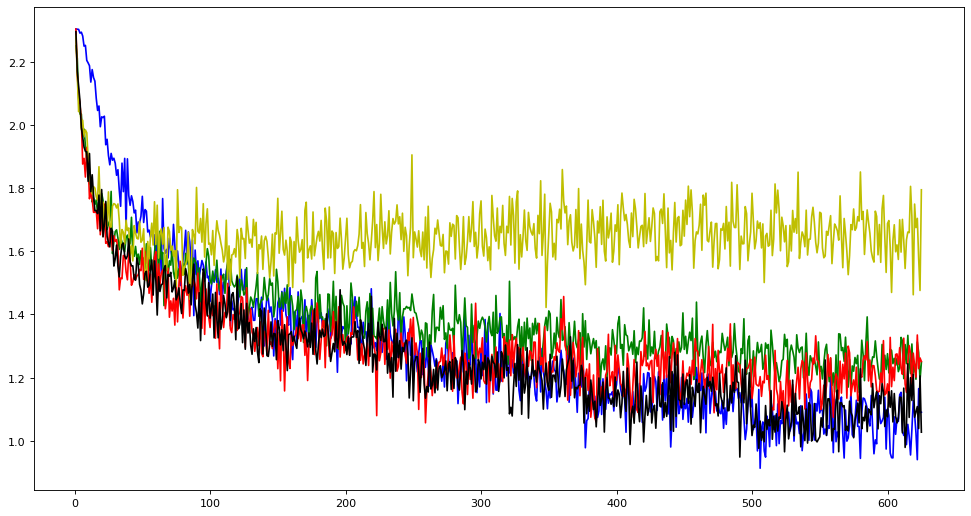

In [12]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(num=1, figsize=(15, 8),dpi=80) 
plt.plot(range(1,626,1),np.array(sgd_lossl),'b')#blue
plt.plot(range(1,626,1),np.array(adag_lossl),'g')#green
plt.plot(range(1,626,1),np.array(rms_lossl),'r')#red
plt.plot(range(1,626,1),np.array(adad_lossl),'y')#yellow
plt.plot(range(1,626,1),np.array(adam_lossl),'k')#black
plt.show()

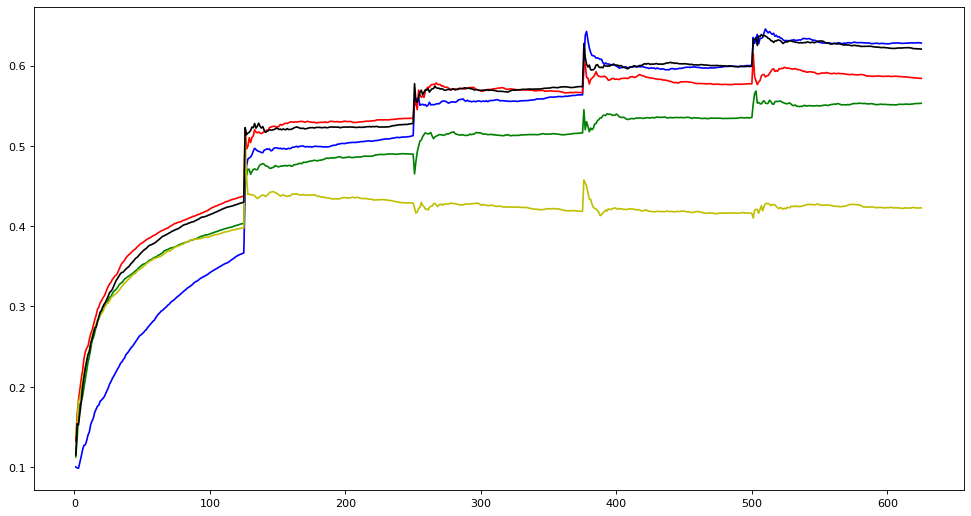

In [13]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(num=1, figsize=(15, 8),dpi=80) 
plt.plot(range(1,626,1),np.array(sgd_acc),'b')
plt.plot(range(1,626,1),np.array(adag_acc),'g')
plt.plot(range(1,626,1),np.array(rms_acc),'r')
plt.plot(range(1,626,1),np.array(adad_acc),'y')
plt.plot(range(1,626,1),np.array(adam_acc),'k')
plt.show()